In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy
from config import weather_api_key
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
print(coordinates)

[(-82.90262931726465, -147.7876368868668), (-35.54364446490404, -3.2130088552538325), (-4.022744072987294, -43.59436122390366), (-33.449187777552154, -139.94285439031873), (-65.10289901084471, -10.631589617809766), (-74.7104519832884, 86.68977997293803), (45.54739530533698, -111.24089506438895), (-81.29494854213749, 98.12690237976813), (30.004772955034383, -18.721550554620478), (31.23147202537119, -163.42882676046608), (9.671107343980651, -48.39350335850418), (-27.717482745758552, 92.13618193745089), (57.632625487843825, -70.1087425889659), (-47.52718106905182, 11.29207445865029), (75.65839193246268, -139.48555752984987), (42.89833267332378, -146.30905084893965), (17.78596374432101, 117.97505709337844), (-51.21851896314415, -33.44827006642453), (67.63231508250837, 115.13787340623333), (-49.466837488252246, -171.12768022911686), (-62.95335198345735, -19.32676571269971), (68.78823916539858, -166.57632635898062), (6.244712774592628, 162.2587961661132), (24.25820545580831, 136.846185494604

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | santa rita
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | belgrade
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | los llanos de aridane
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | cayenne
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | aklavik
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | balingasay
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | udachnyy
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | nome
Processing Record 22 of Set 1 | butaritari
Processing Record 23 of Set 1 | naze
Processing

Processing Record 41 of Set 4 | trinidad
Processing Record 42 of Set 4 | hasaki
Processing Record 43 of Set 4 | canmore
Processing Record 44 of Set 4 | saint-philippe
Processing Record 45 of Set 4 | adana
Processing Record 46 of Set 4 | great yarmouth
Processing Record 47 of Set 4 | pindobacu
Processing Record 48 of Set 4 | gambela
Processing Record 49 of Set 4 | ondorhaan
City not found. Skipping...
Processing Record 50 of Set 4 | moose factory
Processing Record 1 of Set 5 | bolivar
Processing Record 2 of Set 5 | senno
Processing Record 3 of Set 5 | amderma
City not found. Skipping...
Processing Record 4 of Set 5 | vostok
Processing Record 5 of Set 5 | cassino
Processing Record 6 of Set 5 | ancud
Processing Record 7 of Set 5 | srandakan
Processing Record 8 of Set 5 | qasigiannguit
Processing Record 9 of Set 5 | avarua
Processing Record 10 of Set 5 | lazaro cardenas
Processing Record 11 of Set 5 | scarborough
Processing Record 12 of Set 5 | torbay
Processing Record 13 of Set 5 | mocamb

Processing Record 27 of Set 8 | tura
Processing Record 28 of Set 8 | gilbues
Processing Record 29 of Set 8 | magadan
Processing Record 30 of Set 8 | lahat
Processing Record 31 of Set 8 | sorvag
City not found. Skipping...
Processing Record 32 of Set 8 | ndele
Processing Record 33 of Set 8 | bathsheba
Processing Record 34 of Set 8 | ossora
Processing Record 35 of Set 8 | jaguaribe
Processing Record 36 of Set 8 | chiang rai
Processing Record 37 of Set 8 | bukama
Processing Record 38 of Set 8 | shimoda
Processing Record 39 of Set 8 | borogontsy
Processing Record 40 of Set 8 | buin
Processing Record 41 of Set 8 | araouane
Processing Record 42 of Set 8 | aleksandrovsk-sakhalinskiy
Processing Record 43 of Set 8 | kemijarvi
Processing Record 44 of Set 8 | luwuk
Processing Record 45 of Set 8 | huilong
Processing Record 46 of Set 8 | balakhta
Processing Record 47 of Set 8 | malvern
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | fairbanks
Processing Record 50 of Se

Processing Record 17 of Set 12 | vila velha
Processing Record 18 of Set 12 | bubaque
Processing Record 19 of Set 12 | ahipara
Processing Record 20 of Set 12 | linjiang
Processing Record 21 of Set 12 | bure
Processing Record 22 of Set 12 | berlevag
Processing Record 23 of Set 12 | raudeberg
Processing Record 24 of Set 12 | sao jose da coroa grande
Processing Record 25 of Set 12 | visaginas
Processing Record 26 of Set 12 | kargasok
Processing Record 27 of Set 12 | abonnema
Processing Record 28 of Set 12 | samagaltay
Processing Record 29 of Set 12 | danville
Processing Record 30 of Set 12 | chizhou
Processing Record 31 of Set 12 | sinnamary
Processing Record 32 of Set 12 | korla
Processing Record 33 of Set 12 | huazolotitlan
City not found. Skipping...
Processing Record 34 of Set 12 | helong
Processing Record 35 of Set 12 | harnosand
Processing Record 36 of Set 12 | bulawayo
Processing Record 37 of Set 12 | kuryk
Processing Record 38 of Set 12 | port hedland
Processing Record 39 of Set 12

In [10]:
len(city_data)

572

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,48.47,74,34,1.43,NZ,2021-08-06 00:14:10
1,Jamestown,42.0970,-79.2353,74.52,68,1,6.91,US,2021-08-06 00:14:11
2,Santa Rita,-7.1139,-34.9781,72.27,100,0,9.22,BR,2021-08-06 00:14:11
3,Rikitea,-23.1203,-134.9692,74.21,74,39,16.28,PF,2021-08-06 00:12:21
4,Cape Town,-33.9258,18.4232,56.12,96,90,2.30,ZA,2021-08-06 00:10:48
5,Busselton,-33.6500,115.3333,52.47,80,0,8.59,AU,2021-08-06 00:14:11
6,Belgrade,44.8040,20.4651,64.06,83,40,11.50,RS,2021-08-06 00:14:12
7,Albany,42.6001,-73.9662,74.05,79,52,2.35,US,2021-08-06 00:12:25
8,Los Llanos De Aridane,28.6585,-17.9182,68.13,96,75,16.11,ES,2021-08-06 00:14:12
9,Kapaa,22.0752,-159.3190,84.52,75,40,5.01,US,2021-08-06 00:14:12


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-08-06 00:14:10,-46.1927,168.8643,48.47,74,34,1.43
1,Jamestown,US,2021-08-06 00:14:11,42.0970,-79.2353,74.52,68,1,6.91
2,Santa Rita,BR,2021-08-06 00:14:11,-7.1139,-34.9781,72.27,100,0,9.22
3,Rikitea,PF,2021-08-06 00:12:21,-23.1203,-134.9692,74.21,74,39,16.28
4,Cape Town,ZA,2021-08-06 00:10:48,-33.9258,18.4232,56.12,96,90,2.30
5,Busselton,AU,2021-08-06 00:14:11,-33.6500,115.3333,52.47,80,0,8.59
6,Belgrade,RS,2021-08-06 00:14:12,44.8040,20.4651,64.06,83,40,11.50
7,Albany,US,2021-08-06 00:12:25,42.6001,-73.9662,74.05,79,52,2.35
8,Los Llanos De Aridane,ES,2021-08-06 00:14:12,28.6585,-17.9182,68.13,96,75,16.11
9,Kapaa,US,2021-08-06 00:14:12,22.0752,-159.3190,84.52,75,40,5.01


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

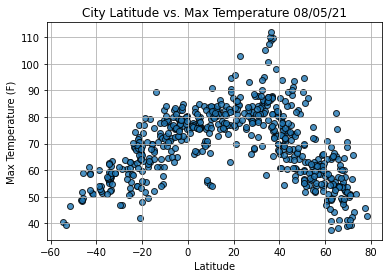

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

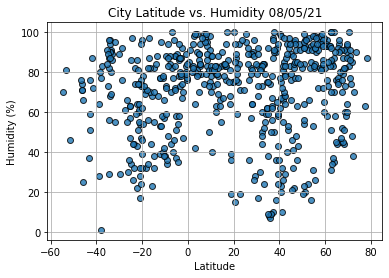

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

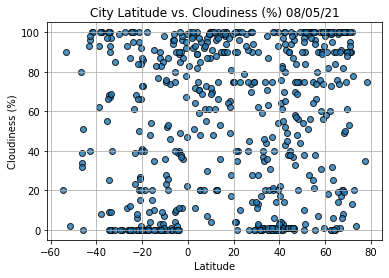

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

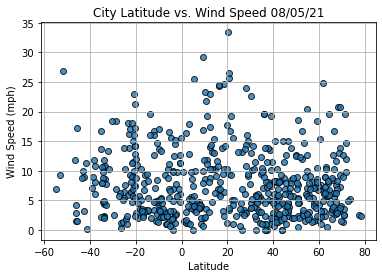

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [56]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print(r_value)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [57]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

-0.6244125703219884


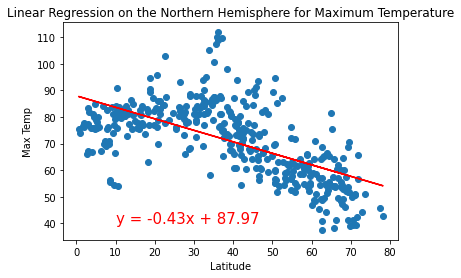

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

0.7760256106708331


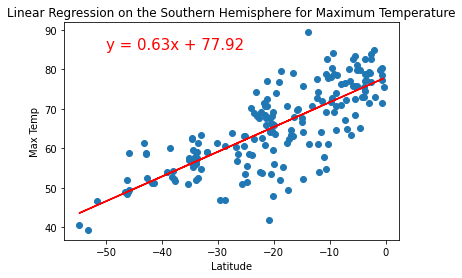

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,85))

-0.04869092357772594


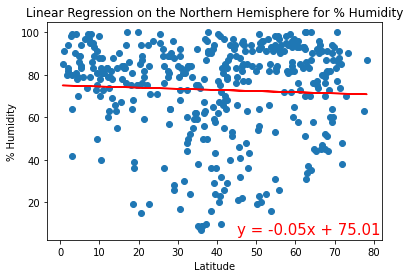

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(45,5))

0.06365644153309934


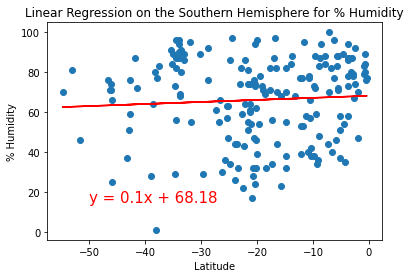

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

-0.027291013071630538


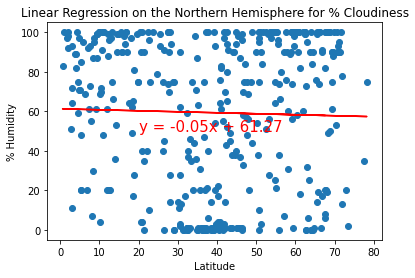

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Humidity',(20,50))

-0.06486814753566883


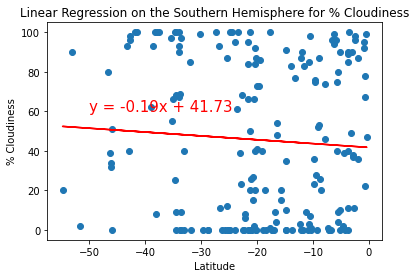

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

-0.1245458424566245


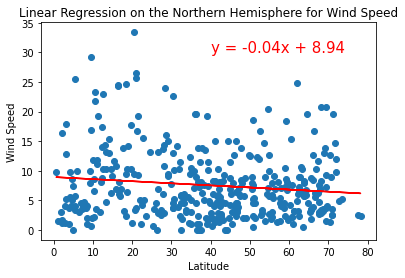

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,30))

-0.11573801525727956


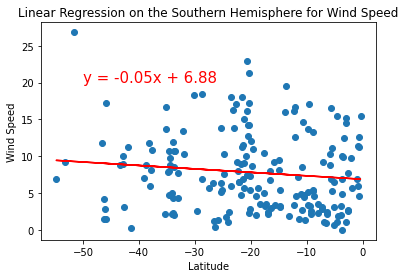

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,20))